In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
import tracemalloc

In [2]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64


Validation roc auc score:  0.8313725490196079
validation accuracy :  0.8365019011406845
validation recall :  0.8
validation f1-score :  0.8036529680365296
validation precision :  0.8073394495412844


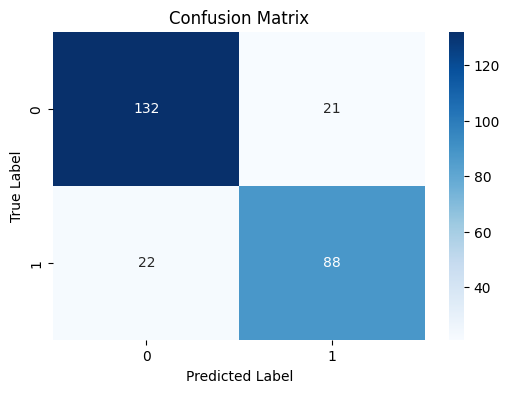

Waktu pelatihan: 11.5382 detik
Penggunaan memori: 1.1314 MB (saat ini), 1.2036 MB (puncak)


In [6]:
#random forest
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_leaf=10,
    criterion='gini'
)

rf_model.fit(X_train_base, y_train_base)
predictions_rf = rf_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8204396910279265
validation accuracy :  0.8326996197718631
validation recall :  0.7454545454545455
validation f1-score :  0.7884615384615384
validation precision :  0.8367346938775511


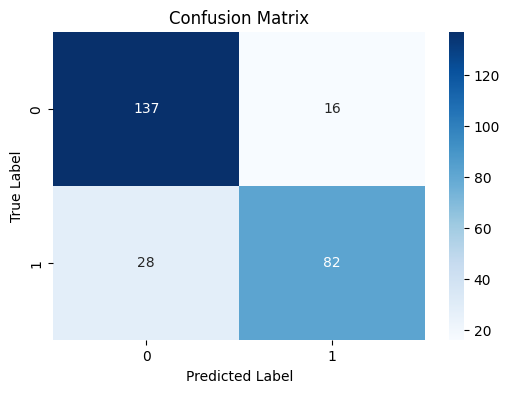

Waktu pelatihan: 5.6077 detik
Penggunaan memori: 1.1302 MB (saat ini), 1.2002 MB (puncak)


In [26]:
#2. extra trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

et_model = ExtraTreesClassifier(
    n_estimators=30,
    max_depth=8,
    min_samples_leaf=4,
    criterion='gini'
)

et_model.fit(X_train_base, y_train_base)
predictions_rf = et_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation roc auc score:  0.83407605466429
validation accuracy :  0.844106463878327
validation recall :  0.7727272727272727
validation f1-score :  0.8056872037914692
validation precision :  0.8415841584158416


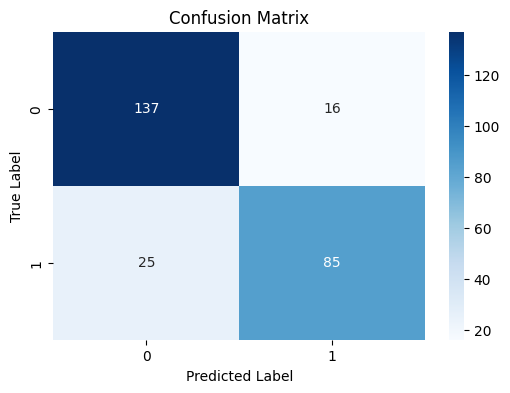

Waktu pelatihan: 9.2394 detik
Penggunaan memori: 1.2639 MB (saat ini), 1.3366 MB (puncak)


In [27]:
#3. Adapative Boosting (AdaaBoost) using smote technique

from sklearn.ensemble  import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

adaboost_model = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.1
)

adaboost_model.fit(X_train_base, y_train_base)
predictions_rf = adaboost_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8560903149138444
validation accuracy :  0.8593155893536122
validation recall :  0.8363636363636363
validation f1-score :  0.832579185520362
validation precision :  0.8288288288288288


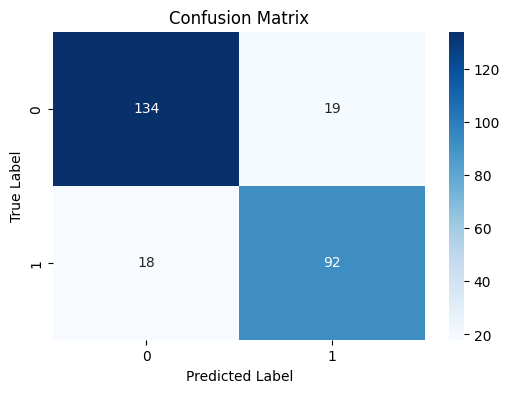

Waktu pelatihan: 12.4032 detik
Penggunaan memori: 1.1486 MB (saat ini), 1.2207 MB (puncak)


In [33]:
#4. Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    min_samples_leaf=5,
    max_depth=3,
    loss='exponential'
)
   

gb_model.fit(X_train_base, y_train_base)
predictions_rf = gb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8535353535353535
validation accuracy :  0.8593155893536122
validation recall :  0.8181818181818182
validation f1-score :  0.8294930875576036
validation precision :  0.8411214953271028


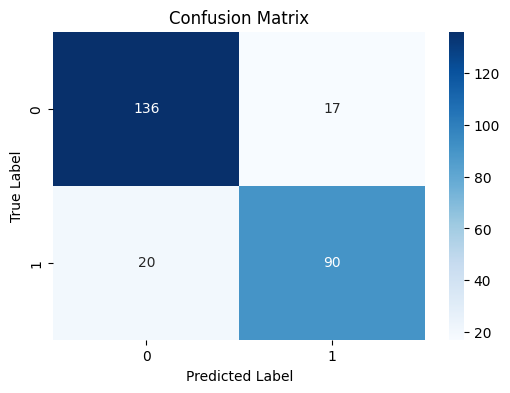

Waktu pelatihan: 10.4409 detik
Penggunaan memori: 1.2915 MB (saat ini), 1.3622 MB (puncak)


In [35]:
#5. Histogram Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

hgb_model = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.1,
    min_samples_leaf=5,
    max_depth=3)
   

hgb_model.fit(X_train_base, y_train_base)
predictions_rf = hgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8457219251336898
validation accuracy :  0.8517110266159695
validation recall :  0.8090909090909091
validation f1-score :  0.8202764976958525
validation precision :  0.8317757009345794


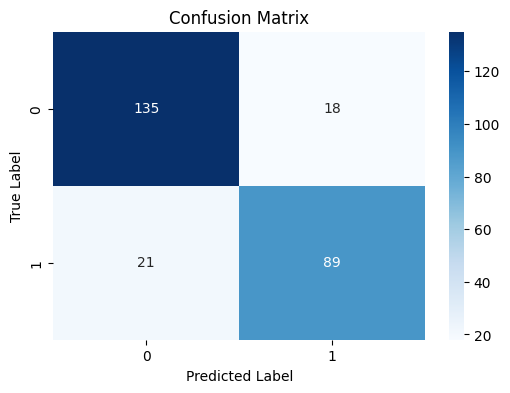

Waktu pelatihan: 0.6127 detik
Penggunaan memori: 15.9372 MB (saat ini), 16.0095 MB (puncak)


In [38]:
#6. XGBoost 

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=4,
    learning_rate=0.1)
   

xgb_model.fit(X_train_base, y_train_base)
predictions_rf = xgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8327985739750446
validation accuracy :  0.844106463878327
validation recall :  0.7636363636363637
validation f1-score :  0.8038277511961722
validation precision :  0.8484848484848485


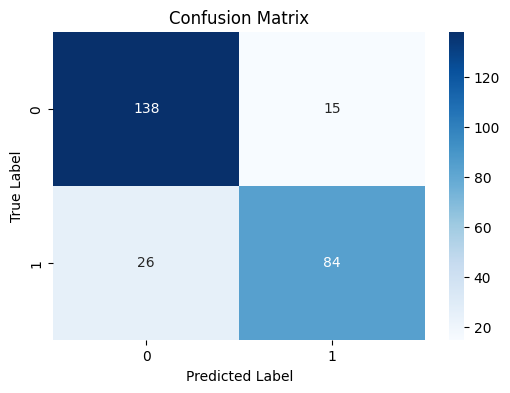

Waktu pelatihan: 7.7507 detik
Penggunaan memori: 1.1572 MB (saat ini), 1.2283 MB (puncak)


In [39]:
#7. Categorical Boosting (CatBoost)

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

cb_model = CatBoostClassifier(
    n_estimators=100,
    loss_function='Logloss',
    learning_rate=0.01,
    depth=5,
    min_data_in_leaf=1,
    random_seed=1,
    logging_level='Silent')
   
cb_model.fit(X_train_base, y_train_base)
predictions_rf = cb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

In [40]:
import pickle

Validation roc auc score:  0.8789661319073085
validation accuracy :  0.8859315589353612
validation recall :  0.8363636363636363
validation f1-score :  0.8598130841121495
validation precision :  0.8846153846153846


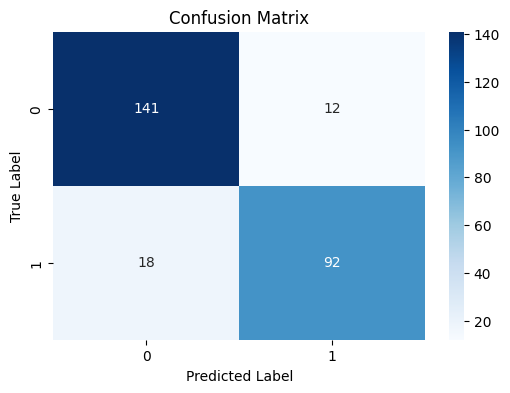

Waktu pelatihan: 42.2623 detik
Penggunaan memori: 2.9014 MB (saat ini), 9.2817 MB (puncak)


In [41]:
#create stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

estimators_base_model = [
    ('randomforest', rf_model),
    ('extratrees', et_model),
    ('adaboost', adaboost_model),
    ('gradboost', gb_model),
    ('hgboost', hgb_model),
    ('xgboost', xgb_model),
    ('catboost', cb_model), 
]

#stacked model with  base model and logistic
stack_model = StackingClassifier(
    estimators=estimators_base_model, 
    final_estimator=RandomForestClassifier(), 
    passthrough=False,
    n_jobs=-1)

#train the model
stack_model.fit(X_train, y_train)

# Simpan model ke file
with open("model_stack2.pkl", "wb") as f:
    pickle.dump(stack_model, f)

#get prediction from stack
stack_predictors = stack_model.predict(X_holdout)

#evaluate model
#metrics calculation
roc_auc = roc_auc_score(y_holdout, stack_predictors)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, stack_predictors)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, stack_predictors)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, stack_predictors)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, stack_predictors)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, stack_predictors)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()


In [14]:
import pickle
import pandas as pd

# Load model
with open("model_stack1.pkl", "rb") as f:
    model = pickle.load(f)

# Load data baru
df = pd.read_csv("D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\predict\class.csv", delimiter=",")

# Kolom yang dipakai saat training
selected_columns = ["cbo", "dit", "fanin", "fanout", "lcom", "noc", "loc", "rfc", "wmc",
    "totalMethodsQty", "protectedMethodsQty", "publicMethodsQty", "privateMethodsQty",
    "finalFieldsQty", "protectedFieldsQty", "publicFieldsQty", "privateFieldsQty"]  # 17 kolom CK Metrics
df = df[selected_columns]
df = df.dropna()

# Predict
predictions = model.predict(df)
df['predicted_bug'] = predictions

# Simpan hasil
df.to_csv("class.csv", index=False)
